In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

# Load the dataset
data = pd.read_csv('Dataset .csv')

In [4]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [10]:
# Task 1: Restaurant Ratings

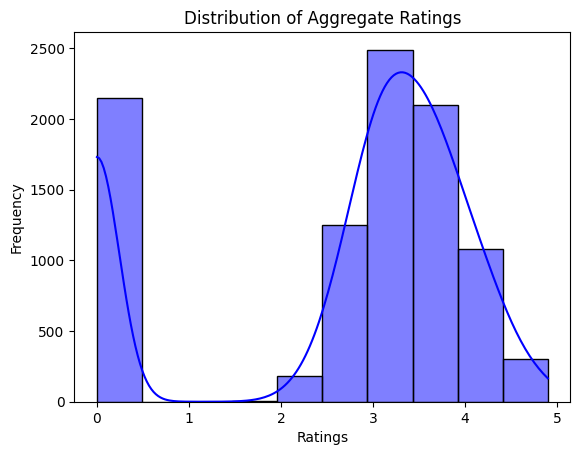

In [14]:
# Analyze the distribution of aggregate ratings and find the most common range
sns.histplot(data['Aggregate rating'], bins=10, kde=True, color="blue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

In [20]:
 # Determine the most common rating range
common_range = data['Aggregate rating'].value_counts().idxmax()
print(f"The most common rating is: {common_range}")

The most common rating is: 0.0


In [13]:
 # Calculate the average number of votes
avg_votes = data['Votes'].mean()
print(f"Average number of votes received by restaurants: {avg_votes}")

Average number of votes received by restaurants: 156.909747670401


In [21]:
# Task 2: Cuisine Combination

# Splitting cuisines into lists
cuisines_list = data['Cuisines'].dropna().apply(lambda x: x.split(", "))
# Counting combinations
combo_counts = Counter([combo for cuisine in cuisines_list for combo in combinations(sorted(cuisine), 2)])
print(f"Most common cuisine combinations: {combo_counts.most_common(5)}")
    
# Checking rating trends for combinations
data['Cuisine Combo'] = data['Cuisines'].dropna().apply(lambda x: tuple(sorted(x.split(", "))))
avg_rating_by_combo = data.groupby('Cuisine Combo')['Aggregate rating'].mean().sort_values(ascending=False)
print(f"Top-rated cuisine combinations:\n{avg_rating_by_combo.head()}")

Most common cuisine combinations: [(('Chinese', 'North Indian'), 1784), (('Mughlai', 'North Indian'), 832), (('Fast Food', 'North Indian'), 485), (('Continental', 'North Indian'), 468), (('Chinese', 'Fast Food'), 466)]
Top-rated cuisine combinations:
Cuisine Combo
(World Cuisine,)                     4.9
(American, BBQ, Sandwich)            4.9
(American, Healthy Food, Mexican)    4.9
(American, Coffee and Tea)           4.9
(American, Caribbean, Seafood)       4.9
Name: Aggregate rating, dtype: float64


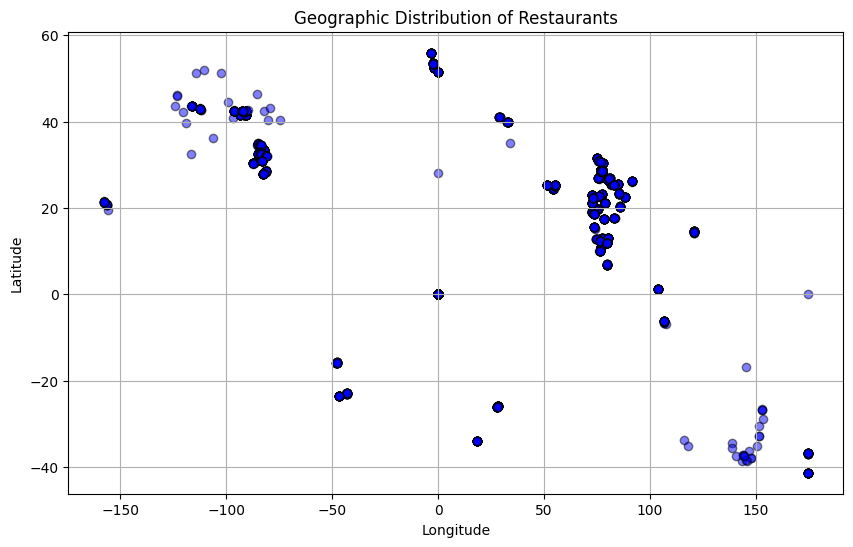

In [23]:
# Task 3: Geographic Analysis
# Filter out rows with missing latitude or longitude values
geo_data = data.dropna(subset=['Latitude', 'Longitude'])

# Plotting the restaurant locations
plt.figure(figsize=(10, 6))
plt.scatter(
    geo_data['Longitude'], 
    geo_data['Latitude'], 
    alpha=0.5, 
    c='blue', 
    edgecolor='k'
)

plt.title("Geographic Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

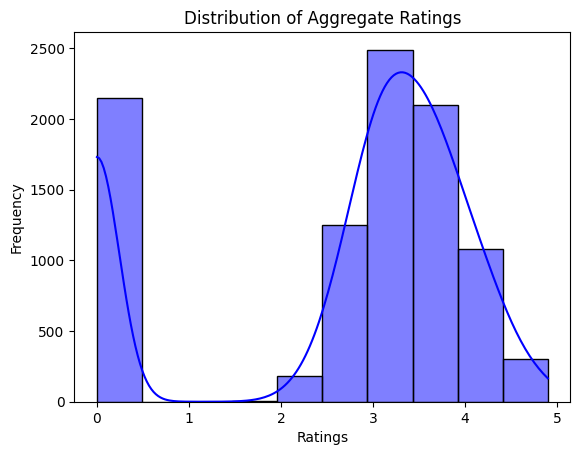

The most common rating is: 0.0
Average number of votes received by restaurants: 156.909747670401
Most common cuisine combinations: [(('Chinese', 'North Indian'), 1784), (('Mughlai', 'North Indian'), 832), (('Fast Food', 'North Indian'), 485), (('Continental', 'North Indian'), 468), (('Chinese', 'Fast Food'), 466)]
Top-rated cuisine combinations:
Cuisine Combo
(World Cuisine,)                     4.9
(American, BBQ, Sandwich)            4.9
(American, Healthy Food, Mexican)    4.9
(American, Coffee and Tea)           4.9
(American, Caribbean, Seafood)       4.9
Name: Aggregate rating, dtype: float64
Map saved as restaurant_locations.html
Number of restaurant chains: 734
Average ratings for chains:
Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Name: Aggregate rating, dtype: float64


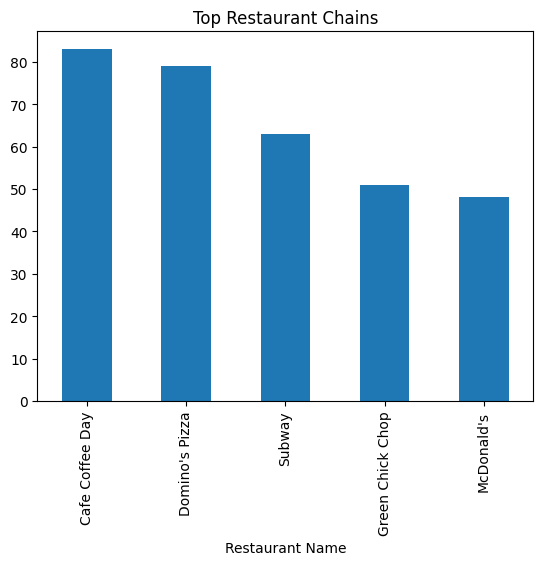

In [9]:
# Task 4: Restaurant Chains
def analyze_chains(data):
    # Identifying chains
    chain_counts = data['Restaurant Name'].value_counts()
    chains = chain_counts[chain_counts > 1]
    print(f"Number of restaurant chains: {len(chains)}")
    
    # Ratings and popularity of chains
    chain_data = data[data['Restaurant Name'].isin(chains.index)]
    avg_rating_chains = chain_data.groupby('Restaurant Name')['Aggregate rating'].mean()
    print(f"Average ratings for chains:\n{avg_rating_chains.sort_values(ascending=False).head()}")
    top_chains = chain_counts.head(5)
    top_chains.plot(kind="bar", title="Top Restaurant Chains")
    plt.show()

# Execute tasks
analyze_ratings(data)
cuisine_combinations(data)
plot_restaurant_locations(data)
analyze_chains(data)